# Fake News Dataset Pre-processing and Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Class Size Comparison

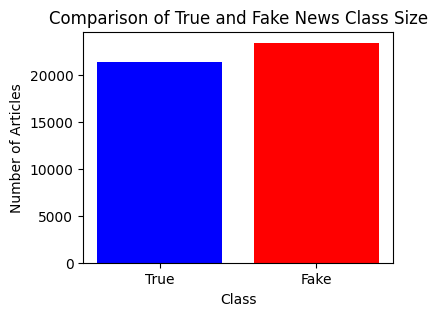

In [7]:
df_true = pd.read_csv('ISOT_dataset/True.csv')
len_df_true = len(df_true)
df_fake = df_fake = pd.read_csv('ISOT_dataset/Fake.csv')
len_df_fake = len(df_fake)

data = {'Class': ['True', 'Fake'], 'Length': [len_df_true, len_df_fake]}
df = pd.DataFrame(data)

plt.figure(figsize=(4, 3))
plt.bar(df['Class'], df['Length'], color=['blue', 'red'])
plt.title('Comparison of True and Fake News Class Size')
plt.xlabel('Class')
plt.ylabel('Number of Articles')
plt.show()

In [8]:
print("Number of instances in the Fake class: " + str(len_df_fake))

Number of instances in the Fake class: 23481


In [9]:
print("Number of instances in the True class: " + str(len_df_true))

Number of instances in the True class: 21417


## Removing Headers

In [112]:
# Count occurrences of "Reuters" in the 'text' column of the True news dataframe
count_reuters_true = df_true['text'].str.contains('Reuters', case=False, na=False).sum()

# Count occurrences of "Reuters" in the 'text' column of the Fake news dataframe
count_reuters_fake = df_fake['text'].str.contains('Reuters', case=False, na=False).sum()

print(f'Number of times "Reuters" is found in True news dataset: {count_reuters_true}')
print(f'Number of times "Reuters" is found in Fake news dataset: {count_reuters_fake}')


Number of times "Reuters" is found in True news dataset: 21378
Number of times "Reuters" is found in Fake news dataset: 322


In [113]:
pattern_to_remove = r'^.*?\(Reuters\)\s*-\s*'
count_with_reuters_header = df_true['text'].str.contains(pattern_to_remove, regex=True).sum()

In [114]:
count_with_reuters_header

21246

In [115]:
len(df_true)

21417

In [116]:
df_true['text'] = df_true['text'].str.replace(r'^.*?\(Reuters\)\s*-\s*', '', regex=True)

In [117]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017"


## Creating the main dataframe

In [118]:
fake_df = df_fake[['title', 'text']]
true_df = df_true[['title', 'text']]

fake_df['class'] = 0
true_df['class'] = 1

/var/folders/h9/7_8cr2zj6_l9fjgdg1nlw7tc0000gn/T/ipykernel_17695/4260983741.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_df['class'] = 0
/var/folders/h9/7_8cr2zj6_l9fjgdg1nlw7tc0000gn/T/ipykernel_17695/4260983741.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_df['class'] = 1


In [119]:
df = pd.concat([fake_df, true_df], ignore_index=True, sort=False)

In [120]:
df['title_text'] = df['title'] + ' ' + df['text']
df.drop(['title', 'text'], axis=1, inplace=True)

In [121]:
df.head()

,class,title_text
0,0,Donald Trump Sends Out Embarrassing New Year’...
1,0,Drunk Bragging Trump Staffer Started Russian ...
2,0,Sheriff David Clarke Becomes An Internet Joke...
3,0,Trump Is So Obsessed He Even Has Obama’s Name...
4,0,Pope Francis Just Called Out Donald Trump Dur...


In [122]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from tqdm import tqdm

In [123]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/mithatkus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mithatkus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Change text to lowercase

In [124]:
def to_lowercase(text):
    return text.lower()

# Apply function
df['title_text'] = df['title_text'].apply(to_lowercase)

## Removing non-textual elements

In [125]:
twitter_occurrences = df['title_text'].str.contains('twitter.com').sum()
potus_occurrences = df['title_text'].str.contains('@potus').sum()
dt_occurrences = df['title_text'].str.contains('@realdonaldtrump').sum()
url_occurrences = df['title_text'].str.count(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+').sum()

pattern1 = r'(?:\.\s*|\s)featured image via .*? images'
occurrences1 = df['title_text'].str.contains(pattern).sum()

pattern2 = r'(?:\.\s*| )featured image via .*? getty images(?: for.*?)?'
occurrences2 = df['title_text'].str.contains(pattern2).sum()

pattern3 = r'featured image.*$'
occurrences3 = df['title_text'].str.contains(pattern3).sum()

print(f"Occurrences of 'twitter.com': {twitter_occurrences}")
print(f"Occurrences of '@potus': {potus_occurrences}")
print(f"Occurrences of '@realdonaldtrump': {dt_occurrences}")
print(f"Occurrences of pattern1: {occurrences1}")
print(f"Occurrences of pattern2: {occurrences2}")
print(f"Occurrences of pattern3: {occurrences3}")
print(f"Occurrences of urls: {url_occurrences}")

Occurrences of 'twitter.com': 3630
Occurrences of '@potus': 318
Occurrences of '@realdonaldtrump': 1497
Occurrences of pattern1: 2100
Occurrences of pattern2: 289
Occurrences of pattern3: 8161
Occurrences of urls: 4681


In [126]:
def remove_non_textual_elements(text):
    # Remove URLs
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove markdown links - (http://url.com)
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)
    # Remove specific patterns
    text = re.sub(r'featured image.*$', '', text)
    # remove 'twitter.com'
    text = re.sub(r'twitter\.com', '', text, flags=re.IGNORECASE)  
    return text

# Apply the function to the 'title_text' column
df['title_text'] = df['title_text'].apply(remove_non_textual_elements)

In [127]:
twitter_occurrences = df['title_text'].str.contains('twitter.com').sum()
potus_occurrences = df['title_text'].str.contains('@potus').sum()
dt_occurrences = df['title_text'].str.contains('@realdonaldtrump').sum()
url_occurrences = df['title_text'].str.count(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+').sum()

pattern1 = r'(?:\.\s*|\s)featured image via .*? images'
occurrences1 = df['title_text'].str.contains(pattern).sum()

pattern2 = r'(?:\.\s*| )featured image via .*? getty images(?: for.*?)?'
occurrences2 = df['title_text'].str.contains(pattern2).sum()

pattern3 = r'featured image.*$'
occurrences3 = df['title_text'].str.contains(pattern3).sum()

print(f"Occurrences of 'twitter.com': {twitter_occurrences}")
print(f"Occurrences of '@potus': {potus_occurrences}")
print(f"Occurrences of '@realdonaldtrump': {dt_occurrences}")
print(f"Occurrences of pattern1: {occurrences1}")
print(f"Occurrences of pattern2: {occurrences2}")
print(f"Occurrences of pattern3: {occurrences3}")
print(f"Occurrences of urls: {url_occurrences}")

Occurrences of 'twitter.com': 20
Occurrences of '@potus': 0
Occurrences of '@realdonaldtrump': 0
Occurrences of pattern1: 0
Occurrences of pattern2: 0
Occurrences of pattern3: 0
Occurrences of urls: 0


In [128]:
df = df[~df['title_text'].str.contains('twitter.com')]

## Remove numbers & punctuation

In [129]:
def remove_numbers_punctuation(text):
    return re.sub(r'\d+|[^a-zA-Z\s]', '', text)

# Apply function
df['title_text'] = df['title_text'].apply(remove_numbers_punctuation)

## Tokenize

In [130]:
def tokenize(text):
    return word_tokenize(text)

# Apply function
df['tokens'] = df['title_text'].apply(tokenize)

## Remove stopwords

In [131]:
stop_words = stopwords.words('english')

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Apply function
df['tokens'] = df['tokens'].apply(remove_stopwords)

## Stemming

In [132]:
stemmer = PorterStemmer()

def stem(tokens):
    return [stemmer.stem(word) for word in tokens]

# Apply function
df['stemmed_tokens'] = df['tokens'].apply(stem)

## Join Stemmed Tokens 

In [133]:
def tokens_to_string(tokens):
    return ' '.join(tokens)

# Apply function
df['clean_text'] = df['stemmed_tokens'].apply(tokens_to_string)

In [134]:
df.head()

,class,title_text,tokens,stemmed_tokens,clean_text
0,0,donald trump sends out embarrassing new years...,"[donald, trump, sends, embarrassing, new, year...","[donald, trump, send, embarrass, new, year, ev...",donald trump send embarrass new year eve messa...
1,0,drunk bragging trump staffer started russian ...,"[drunk, bragging, trump, staffer, started, rus...","[drunk, brag, trump, staffer, start, russian, ...",drunk brag trump staffer start russian collus ...
2,0,sheriff david clarke becomes an internet joke...,"[sheriff, david, clarke, becomes, internet, jo...","[sheriff, david, clark, becom, internet, joke,...",sheriff david clark becom internet joke threat...
3,0,trump is so obsessed he even has obamas name ...,"[trump, obsessed, even, obamas, name, coded, w...","[trump, obsess, even, obama, name, code, websi...",trump obsess even obama name code websit imag ...
4,0,pope francis just called out donald trump dur...,"[pope, francis, called, donald, trump, christm...","[pope, franci, call, donald, trump, christma, ...",pope franci call donald trump christma speech ...


In [135]:
df = df[['class','clean_text']]

In [136]:
df.head()

,class,clean_text
0,0,donald trump send embarrass new year eve messa...
1,0,drunk brag trump staffer start russian collus ...
2,0,sheriff david clark becom internet joke threat...
3,0,trump obsess even obama name code websit imag ...
4,0,pope franci call donald trump christma speech ...


In [137]:
df.dropna(subset=['clean_text'], inplace=True)

In [138]:
df.to_csv('cleanedISOT.csv', index=False)